## In this noteboook, we draw wordcloud to see what are the frequent words under each sentiment on the "race" discussions data that is subsetted from the overall house discussion data.

In [1]:
import string
from collections import Counter
import numpy as np

#import pygal
import matplotlib.pyplot as plt
import nltk
#nltk.download('vader_lexicon')

import pandas as pd

In [2]:
df = pd.read_csv("race.csv")
df1=df[['selftext','num_comments','score','title']]
df1=df1.dropna(subset=['selftext'])

#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]
#df1=df1[(df1.selftext!=' [ ') & (df1.selftext!=' ')]

#drop duplicate
df1=df1.drop_duplicates(subset=['selftext']).reset_index()
df1

,index,selftext,num_comments,score,title
0,0,start tech house eas house melt deep house pic...,0,1,Jamie Jones and The Martinez Bros - Live at Ka...
1,1,kept all fall ra beat segment greg wilson resp...,8,21,Facebook has been pretty good today... Nina vs...
2,2,ok desperately looking song friend suggested s...,2,1,"Looking for a track,need help"
3,3,looking name house track sample rudy francisco...,0,1,Searching
4,4,track like ultra nate free mood ii swing every...,1,1,I'm searching house music and really need you ...
5,5,feeling peggy gou starry night kettama eastsid...,61,42,Best house track of 2019?
6,6,someone could please stick link would really h...,4,3,"Hello, i posted up a load of tunes the other d..."
7,7,sure type post allowed here tried r ifyoulikeb...,2,1,More house similar to these tracks?
8,8,hi guy thought might able help looking house t...,0,1,Looking for a song!! American Boy remix?
9,9,remix muriel dacqs tropique absolute banger ri...,0,1,Can someone help me find this song?


In [3]:
df_word=pd.read_csv('EMOTION.csv')
df_word=df_word[df_word['emotion-intensity-score']>0.6]
df_word

,word,emotion,emotion-intensity-score
0,outraged,anger,0.964
1,brutality,anger,0.959
2,hatred,anger,0.953
3,hateful,anger,0.940
4,terrorize,anger,0.939
...,...,...,...
8758,inspired,trust,0.602
8759,brighten,trust,0.602
8760,sympathetic,trust,0.602
8761,fulfill,trust,0.602


In [4]:
set(df_word.emotion)

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

## Find specific emotional words

In [5]:
df_word[df_word.word == 'risk']

,word,emotion,emotion-intensity-score


In [6]:
df_word[df_word.word == 'account']

,word,emotion,emotion-intensity-score


In [7]:
df_word[df_word.word == 'time']

,word,emotion,emotion-intensity-score


In [8]:
df_word= df_word[df_word.word != 'fire']
df_word= df_word[df_word.word != 'account']

## General Barplot

In [9]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

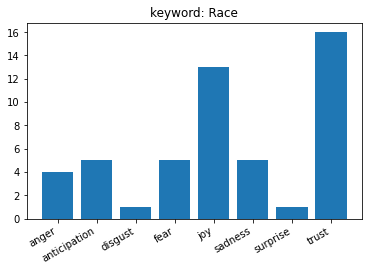

In [10]:
col = [x for x in df1['selftext']]
text = str(col)

lower_case = text.lower()
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = cleaned_text.split()
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)
        

emotion_list = []
word=list(df_word.word)
emotion=list(df_word.emotion)

for i in range(len(df_word)):
    if word[i] in final_words:
        emotion_list.append(emotion[i])
            
w = Counter(emotion_list)
            
            
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.title('keyword: Race')
plt.show()

In [11]:
def emo(tokens,emo):
    zip_iterator = zip(df_word.word, df_word.emotion)
    D= dict(zip_iterator)
    newDict = dict(filter(lambda x: x[1]== emo, D.items()))
    emotion_words=list(newDict.keys())
    List=list(itertools.chain(*tokens))
    
    result = []
    for word in List:
        if word in emotion_words:
            result.append(word)
    return result

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(words):

    # Create a list of word
    text=' '.join(words)

    # Create the wordcloud object
    wordcloud = WordCloud(width=1500, height=1000, margin=0,background_color='white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [13]:
import nltk
lower_case = df1['selftext'].str.lower()
cleaned_text = lower_case.str.translate(str.maketrans('', '', string.punctuation))
tokens=cleaned_text.apply(lambda x: nltk.word_tokenize(x))
print(tokens)

0     [start, tech, house, eas, house, melt, deep, h...
1     [kept, all, fall, ra, beat, segment, greg, wil...
2     [ok, desperately, looking, song, friend, sugge...
3     [looking, name, house, track, sample, rudy, fr...
4     [track, like, ultra, nate, free, mood, ii, swi...
5     [feeling, peggy, gou, starry, night, kettama, ...
6     [someone, could, please, stick, link, would, r...
7     [sure, type, post, allowed, here, tried, r, if...
8     [hi, guy, thought, might, able, help, looking,...
9     [remix, muriel, dacqs, tropique, absolute, ban...
10    [link, amp, xb, omnia, nightclub, vega, long, ...
11    [title, looking, modern, house, track, race, i...
12    [hey, guy, new, sub, new, genre, too, recently...
13    [shall, go, sinning, grace, may, increase, sof...
14    [hello, amp, xb, two, room, college, town, amp...
15    [cranky, owl, hit, traxsource, top, deephouse,...
Name: selftext, dtype: object


In [14]:
import itertools

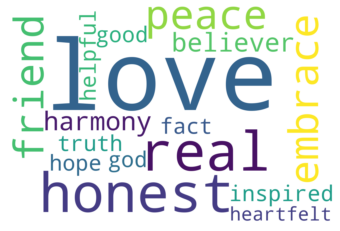

In [15]:

trust=emo(tokens,'trust')
wordcloud(trust)

In [16]:
Counter(trust).most_common(10)

[('love', 17),
 ('real', 2),
 ('honest', 2),
 ('friend', 1),
 ('embrace', 1),
 ('peace', 1),
 ('harmony', 1),
 ('believer', 1),
 ('inspired', 1),
 ('hope', 1)]

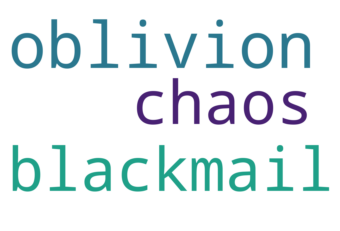

In [17]:
fear=emo(tokens,'fear')
wordcloud(fear)

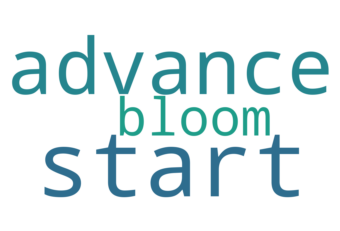

In [18]:
anticipation=emo(tokens,'anticipation')
wordcloud(anticipation)

In [19]:
Counter(anticipation).most_common(10)

[('start', 1), ('advance', 1), ('bloom', 1)]

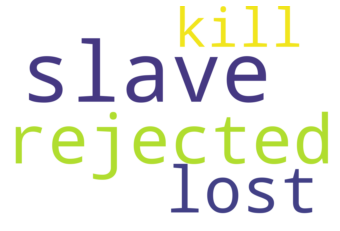

In [20]:
sadness=emo(tokens,'sadness')
wordcloud(sadness)

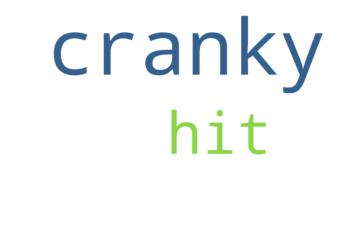

In [21]:
anger=emo(tokens,'anger')
wordcloud(anger)

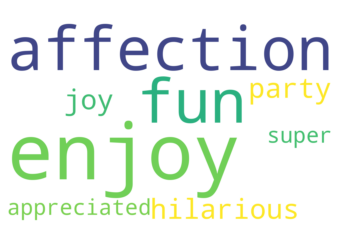

In [22]:
joy=emo(tokens,'joy')
wordcloud(joy)